# TASK-I

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd

### Importing the dataset

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]

In [3]:
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


##### Removing unassigned boroughs:

In [4]:
df2 = df[df['Borough'] != 'Not assigned']

In [5]:
df2.shape

(103, 3)

##### Grouping by Postal Code and seperating neigbourhood values by commas:

In [6]:
df4 = df2.groupby('Postal Code')['Neighbourhood'].apply(', '.join).reset_index()

In [7]:
df4['Borough'] = df2['Borough']

In [8]:
df4.head()

,Postal Code,Neighbourhood,Borough
0,M1B,"Malvern, Rouge",NaN
1,M1C,"Rouge Hill, Port Union, Highland Creek",NaN
2,M1E,"Guildwood, Morningside, West Hill",North York
3,M1G,Woburn,North York
4,M1H,Cedarbrae,Downtown Toronto


In [9]:
df2.head()

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


##### Filtering out neighbourhoods

In [10]:
df5 = df2[df2['Neighbourhood'] != 'Not assigned']

In [11]:
df5.shape

(103, 3)

# TASK-II

### Importing Geospatial Data

In [20]:
lldf = pd.read_csv('https://cocl.us/Geospatial_data')

In [22]:
lldf.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


### Joining data frames

##### We perform an inner join to obtain a single dataframe with all details.

In [23]:
merged_inner = pd.merge(left=lldf, right=df5, left_on='Postal Code', right_on='Postal Code')

In [25]:
df_merged = merged_inner

In [26]:
df_merged.head()

,Postal Code,Latitude,Longitude,Borough,Neighbourhood
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge"
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,43.770992,-79.216917,Scarborough,Woburn
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae


# TASK-III

### Importing Prerequisites

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

### Using k-means method to find and generate optimum number of clusters

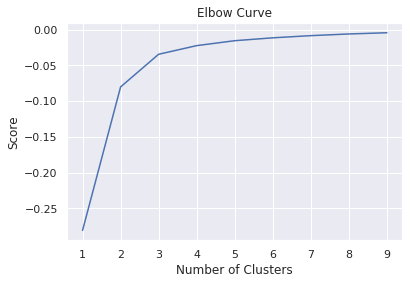

In [29]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_merged[['Latitude']]
X_axis = df_merged[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [36]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(df_merged[df_merged.columns[1:3]]) # Compute k-means clustering.
df_merged['cluster_label'] = kmeans.fit_predict(df_merged[df_merged.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df_merged[df_merged.columns[1:3]]) # Labels of each point
df_merged.head(10)

,Postal Code,Latitude,Longitude,Borough,Neighbourhood,cluster_label
0,M1B,43.806686,-79.194353,Scarborough,"Malvern, Rouge",1
1,M1C,43.784535,-79.160497,Scarborough,"Rouge Hill, Port Union, Highland Creek",1
2,M1E,43.763573,-79.188711,Scarborough,"Guildwood, Morningside, West Hill",1
3,M1G,43.770992,-79.216917,Scarborough,Woburn,1
4,M1H,43.773136,-79.239476,Scarborough,Cedarbrae,1
5,M1J,43.744734,-79.239476,Scarborough,Scarborough Village,1
6,M1K,43.727929,-79.262029,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",1
7,M1L,43.711112,-79.284577,Scarborough,"Golden Mile, Clairlea, Oakridge",1
8,M1M,43.716316,-79.239476,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",1
9,M1N,43.692657,-79.264848,Scarborough,"Birch Cliff, Cliffside West",1


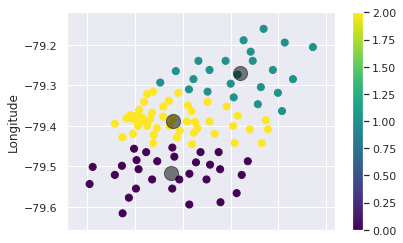

In [37]:
df_merged.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

 ### Using folium to plot the map

In [ ]:
!conda install -c conda-forge folium --yes

In [ ]:
import folium
kclusters = 3
# create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for Lat, Lon, poi, cluster in zip(df_merged['Latitude'], df_merged['Longitude'], df_merged['Neighbourhood'], df_merged['cluster_label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [Lat, Lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters